In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from scipy import stats

In [2]:
seed = 2
dim = 100 #change here for 5D 10D 50D problems


np.random.seed(seed)

In [3]:
def drift(x):
    '''
    x: (bs, dim)
    return: (bs, dim)
    '''
    drt = - x* (x-1) * (x+1)
#     drt = drt * 4
    return drt

In [4]:
mat = np.eye(dim)
for i in range(dim-1):
    mat[i+1,i] = 1

In [5]:
mat

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 1., 1.]])

In [6]:
ref_bs = 100000
ref_dt = 0.01
ref_steps = 500
ref_sigma = 1.0
ref = np.zeros([ref_steps + 1, ref_bs, dim])
ref[0,...] = np.random.normal(0,0.2,[ref_bs, dim])


for i in range(ref_steps):
    if i %10 == 0:
        print(i, end = " ")
    ref[i+1,...] = ref[i,...] + ref_dt * drift(ref[i,...]) + np.sqrt(ref_dt) * np.random.normal(0,ref_sigma,[ref_bs,dim]) @ (mat.T) 

0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 300 310 320 330 340 350 360 370 380 390 400 410 420 430 440 450 460 470 480 490 

In [7]:
for i in [0, 10, 20, 50, 70, 100, 150, 500]:
    np.savez("ref_{}.npz".format(i), ref = ref[i])

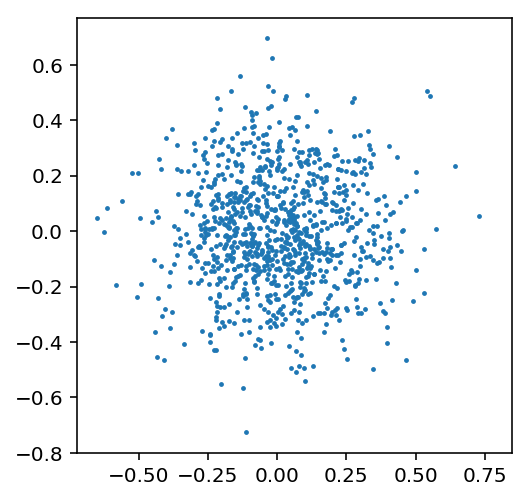

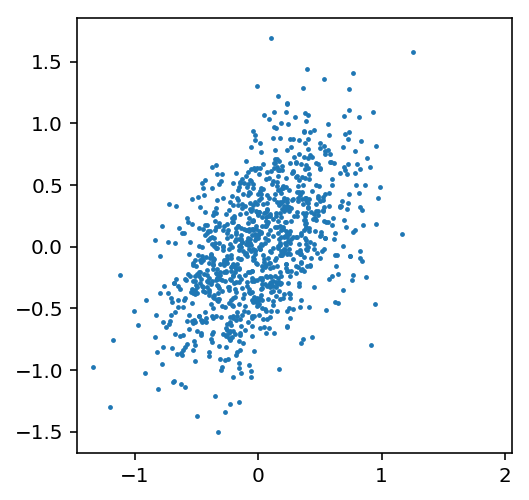

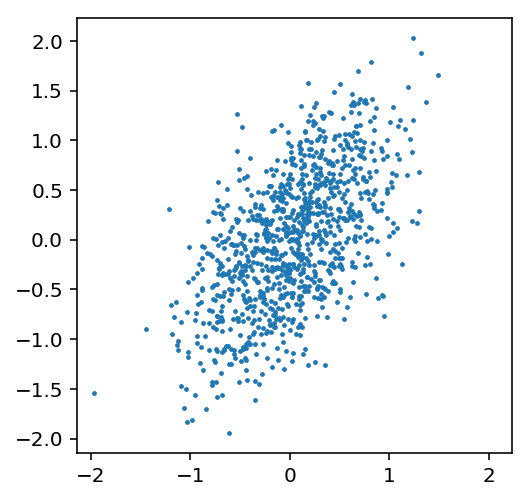

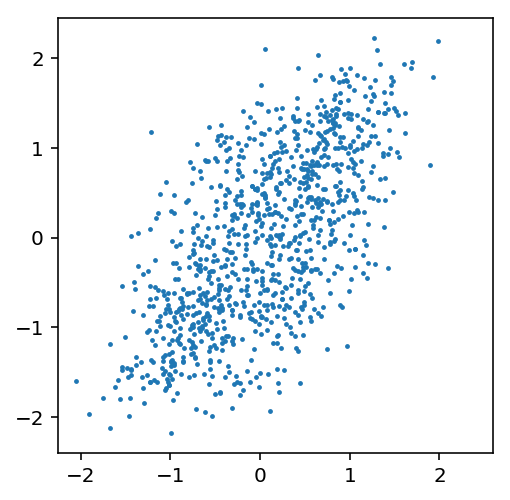

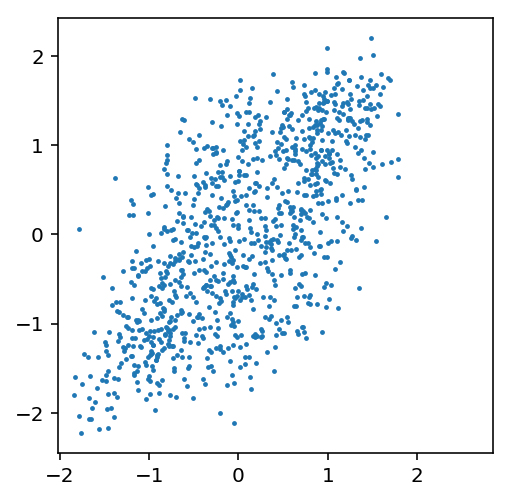

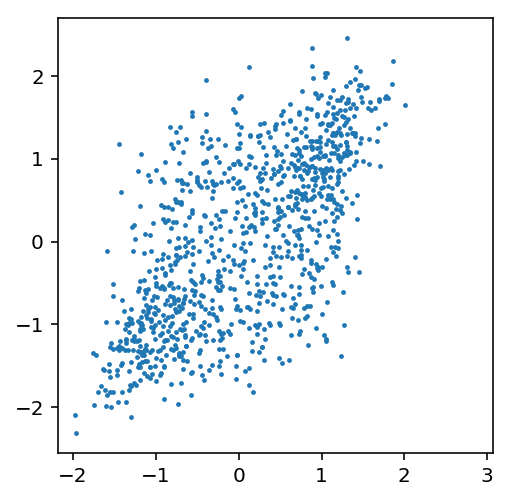

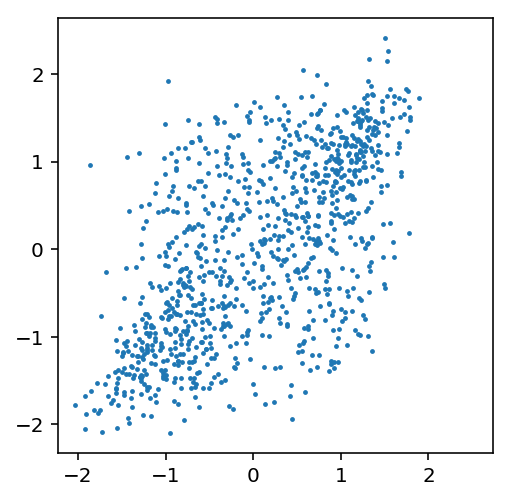

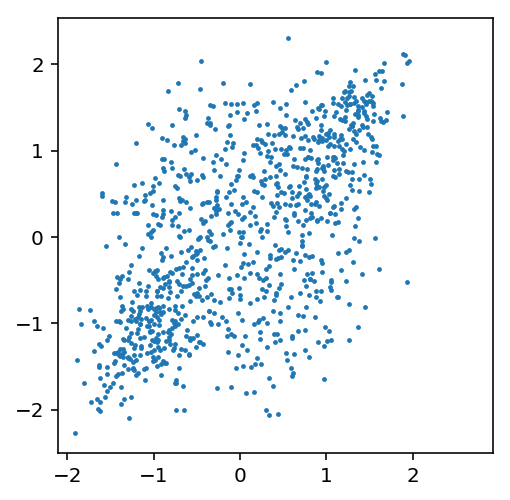

In [8]:
for i in [0, 10, 20, 50, 70, 100, 150, 500]:
    plt.scatter(ref[i,0:1000,0],ref[i,0:1000,1], s = 2)
    plt.axis('square')
    plt.show()